In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix, init_printing
init_printing()

2023-03-20 14:53:59.195943: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 14:53:59.519305: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-20 14:54:00.522533: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/sathish/miniconda3/envs/tf/lib/
2023-03-20 14:54:00.528525: W tensorflow/compiler/xla/strea

In [2]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="posenet_mobilenet_v1_075_353_481_quant.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [3]:
img = cv2.imread('OIP.jpg')
img_resize = cv2.resize(img,(481,353))
input_data = tf.expand_dims(img_resize[:,:,[2,1,0]], axis=0)
input_data.shape

2023-03-20 14:54:02.505600: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-20 14:54:02.579632: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-20 14:54:02.579685: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-20 14:54:02.582018: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other ope

TensorShape([1, 353, 481, 3])

In [4]:
# Test model on random input data.
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

In [5]:
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
output_data_1 = interpreter.get_tensor(output_details[1]['index'])
output_data_2 = interpreter.get_tensor(output_details[2]['index'])


In [6]:
display(Matrix(output_data[0][:,:,0]))

⎡0   4   6   2   0   0   5   12  22  8   0   0   0   11    7    0    4   6   9   0   0   0   0   0   0   0   0   0 
⎢                                                                                                                  
⎢19  2   0   0   0   0   0   0   0   0   0   0   0    5   23    6    8   6   0   0   0   0   0   0   0   0   0   0 
⎢                                                                                                                  
⎢14  0   0   0   0   0   5   5   19  16  7   6   38  94   143  127  58   15  0   0   0   0   0   0   0   0   0   0 
⎢                                                                                                                  
⎢26  0   0   0   0   0   0   1   2   6   9   17  81  175  208  219  143  47  15  8   7   0   0   0   5   2   0   0 
⎢                                                                                                                  
⎢25  0   0   0   0   0   2   7   6   17  15  26  89  192  199  213  180 

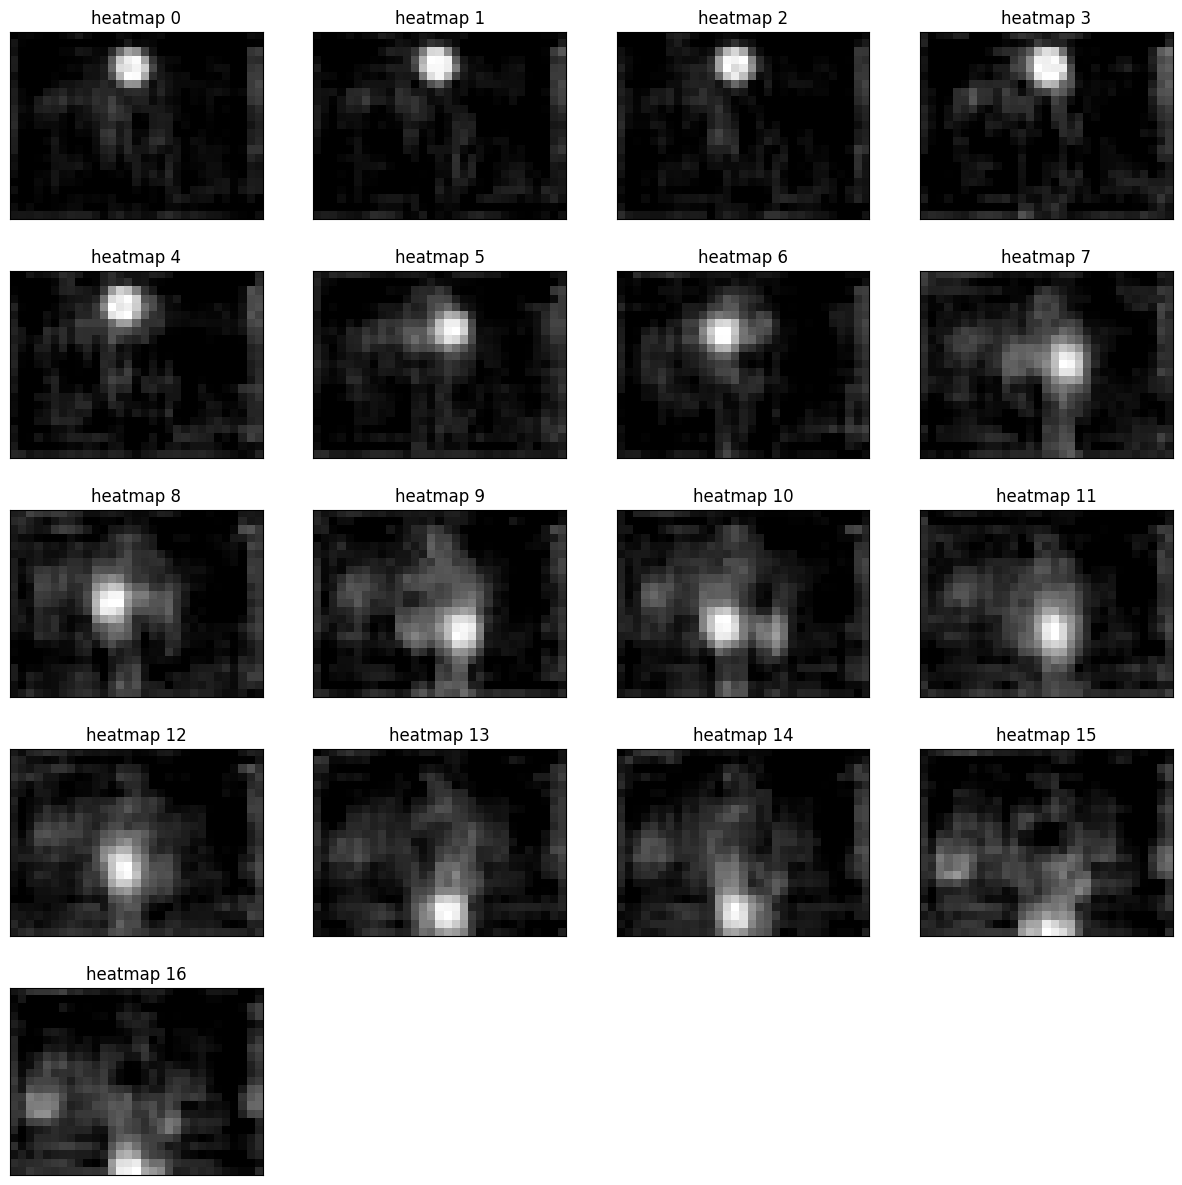

In [7]:
figure = plt.figure(figsize=(15, 15))
for i in range(17):
    plt.subplot(5, 4, i+1, title='heatmap {}'.format(i))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(output_data[0][:, :, i], cmap='gray')


In [8]:
display(Matrix(output_data_1[0][:,:,0]))

⎡124  74   80    0    1    3   72   111  151  158  144  147  153  186  194  197  207  213  198  137  50    0    0  
⎢                                                                                                                  
⎢92   17    0    0    0    0    2   183  255  255  225  232  255  255  255  255  255  255  176  58   19   75   91  
⎢                                                                                                                  
⎢243  204  152   0    0    0   136  219  255  255  255  255  255  255  255  255  255  255  255  160   7    0   13  
⎢                                                                                                                  
⎢175  101  31    0    0    0   114  239  255  255  255  255  255  255  255  255  255  255  255  154  147  121  185 
⎢                                                                                                                  
⎢154  156  99    0    5   90   207  238  255  255  255  165  133  131  1

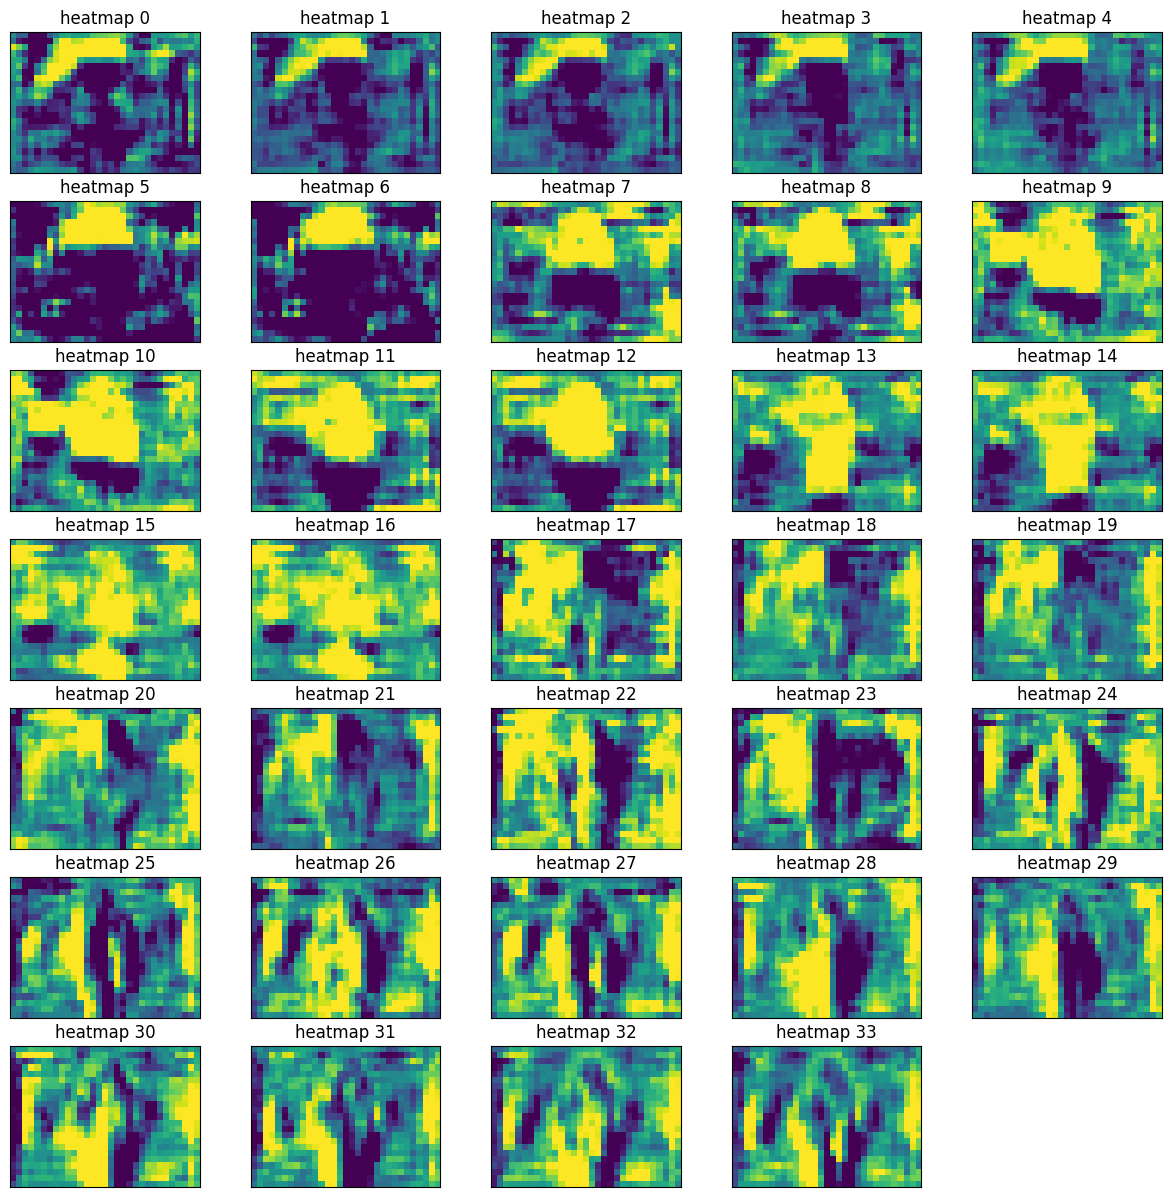

In [9]:
figure = plt.figure(figsize=(15, 15))
for i in range(34):
    plt.subplot(7, 5, i+1, title='heatmap {}'.format(i))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(output_data_1[0][:, :, i])

need output quantization 0.0784313753247261 128


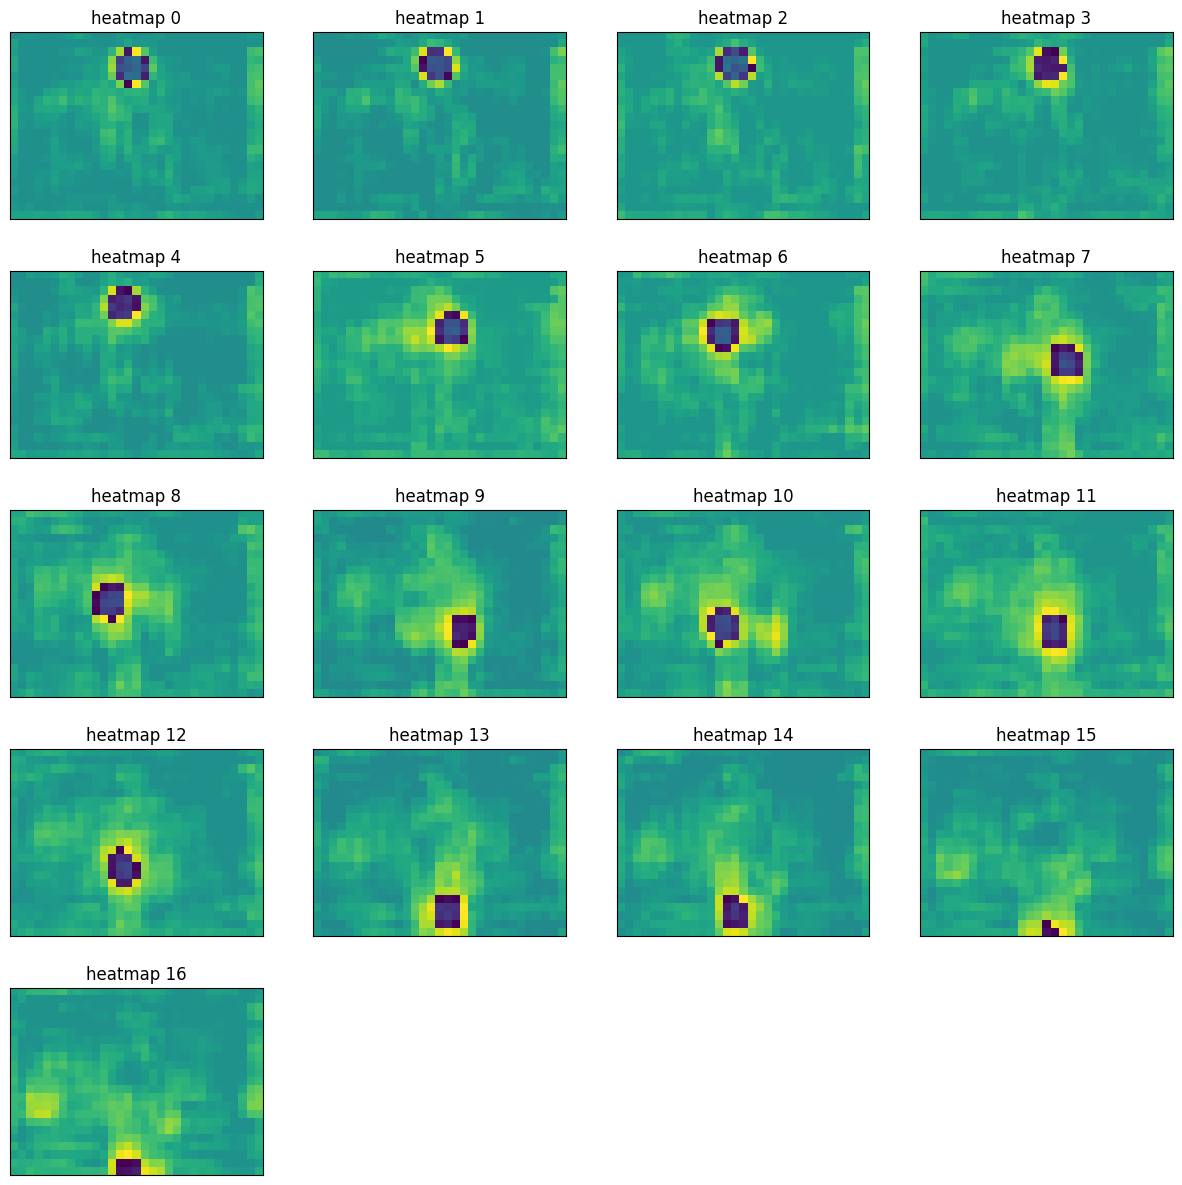

In [10]:
dequantized_scores = None
output_scale, output_zero_point = output_details[0]["quantization"]
if (output_scale, output_zero_point) != (0.0, 0):
    print("need output quantization",output_scale,output_zero_point)
    #y_pred = y_pred.astype(np.float32)
    dequantized_scores = (output_data - output_zero_point) * output_scale
    
figure = plt.figure(figsize=(15, 15))
for i in range(17):
    plt.subplot(5, 4, i+1, title='heatmap {}'.format(i))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dequantized_scores[0][:, :, i])
#display(Matrix(scores[0][:,:,0]))

In [11]:
display(Matrix(dequantized_scores[0][:,:,0]))

⎡10.0392160415649  10.3529415428638  10.5098042935133  10.1960787922144  10.0392160415649  10.0392160415649  10.431
⎢                                                                                                                  
⎢11.5294121727347  10.1960787922144  10.0392160415649  10.0392160415649  10.0392160415649  10.0392160415649  10.039
⎢                                                                                                                  
⎢11.1372552961111  10.0392160415649  10.0392160415649  10.0392160415649  10.0392160415649  10.0392160415649  10.431
⎢                                                                                                                  
⎢12.0784318000078  10.0392160415649  10.0392160415649  10.0392160415649  10.0392160415649  10.0392160415649  10.039
⎢                                                                                                                  
⎢12.0000004246831  10.0392160415649  10.0392160415649  10.0392160415649 

need output quantization 0.0784313753247261 128


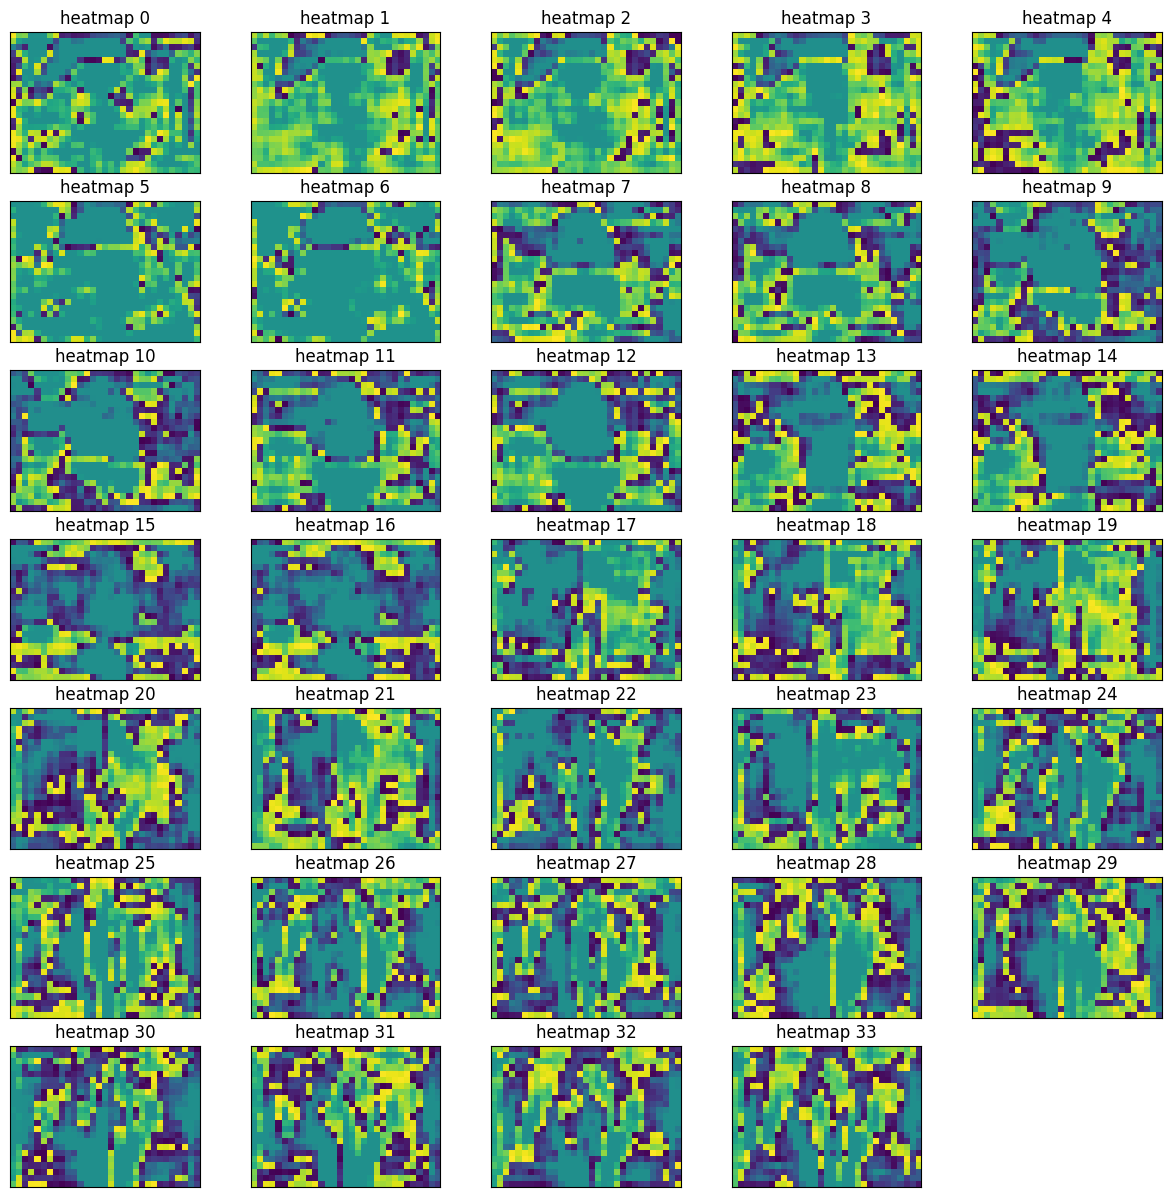

In [12]:
dequantized_short_offsets = None
output_scale, output_zero_point = output_details[1]["quantization"]
if (output_scale, output_zero_point) != (0.0, 0):
    print("need output quantization",output_scale,output_zero_point)
    #y_pred = y_pred.astype(np.float32)
    dequantized_short_offsets = (output_data_1 - output_zero_point) * output_scale  * (1/16)

figure = plt.figure(figsize=(15, 15))
for i in range(34):
    plt.subplot(7, 5, i+1, title='heatmap {}'.format(i))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dequantized_short_offsets[0][:, :, i])

need output quantization 1.3875764608383179 117


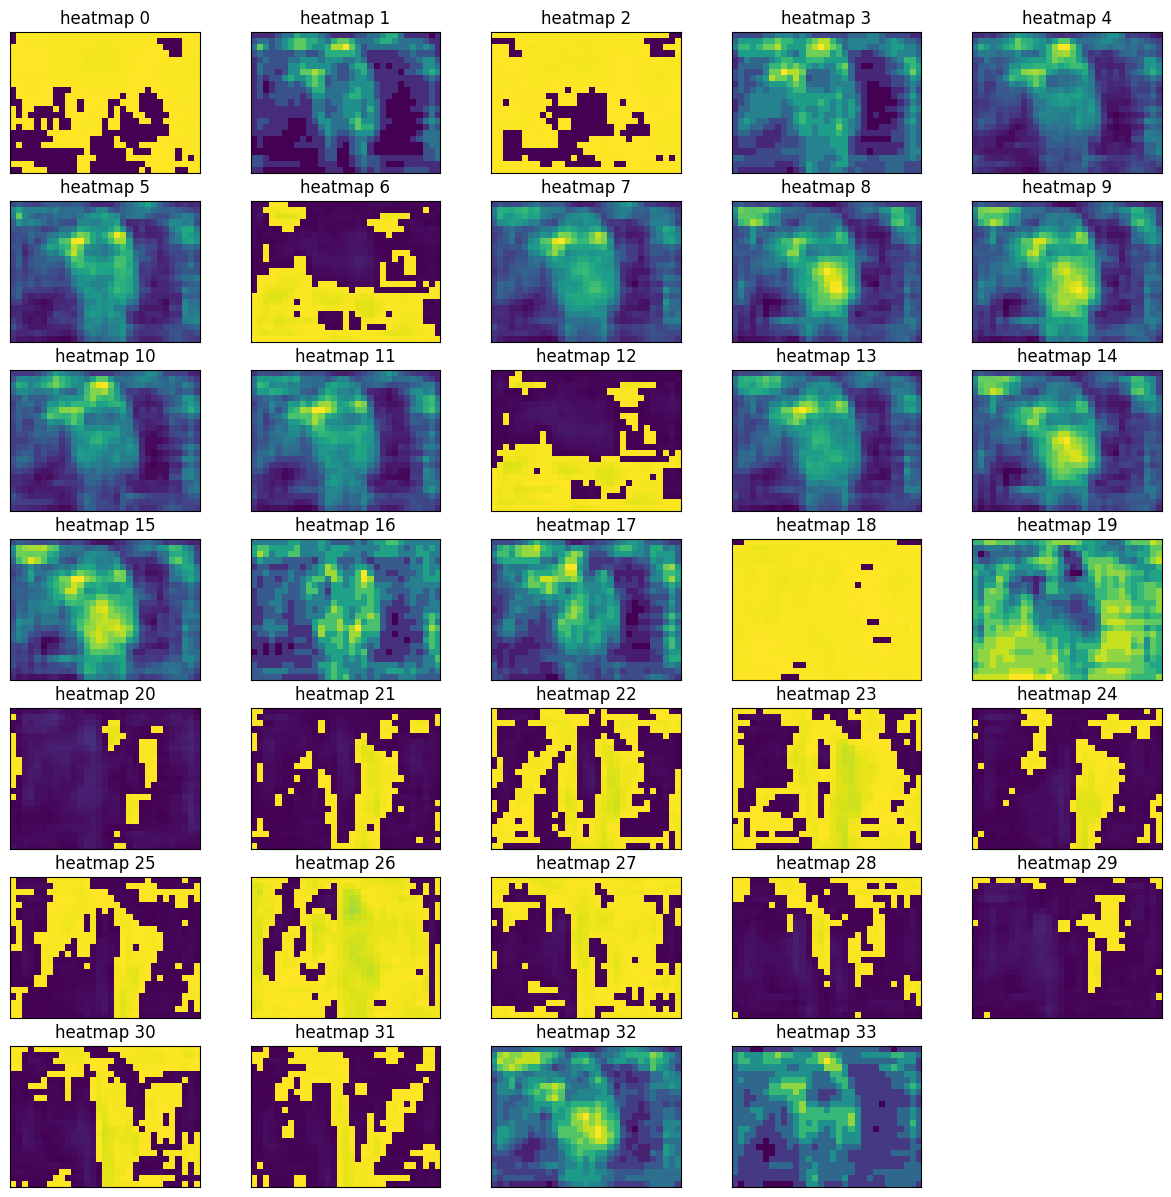

In [57]:
dequantizied_mid_offsets = None
output_scale, output_zero_point = output_details[2]["quantization"]
if (output_scale, output_zero_point) != (0.0, 0):
    print("need output quantization",output_scale,output_zero_point)
    #y_pred = y_pred.astype(np.float32)
    dequantizied_mid_offsets = (output_data_2 - output_zero_point) * output_scale  * (1/16)
    
figure = plt.figure(figsize=(15, 15))
for i in range(34):
    plt.subplot(7, 5, i+1, title='heatmap {}'.format(i))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dequantizied_mid_offsets[0][:, :, i])

In [74]:
import enum
import heapq

scores        = dequantized_scores[0].flatten()
short_offsets = dequantized_short_offsets[0].flatten()
mid_offsets   = dequantizied_mid_offsets[0].flatten()

with open('image_data.h', 'w') as fout:
    print('#include <stdint.h>\n',file=fout)
    print('static const float heatmap[] = {', file=fout)
    scores.tofile(fout, ', ', '%f')
    print('};\n', file=fout)
    
    print('\nstatic const float short_offsets[] = {', file=fout)
    short_offsets.tofile(fout, ', ', '%f')
    print('};\n', file=fout)
    
    print('\nstatic const float mid_offsets[] = {', file=fout)
    mid_offsets.tofile(fout, ', ', '%f')
    print('};\n', file=fout)
    
